# Demonstartion of Random & Grid Search

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("gold fund.csv")

In [3]:
df.head()

,ID,Gender,AMB,AccountSince,RelationshipSize,AvgMonthlyTxn,DematAccounts,FD_Nos,MF_nos,Equity_mfs,Debt_mfs,Balanced_Funds,ELSS,PMS_accounts,Trading_Accounts,Speciality_funds,Gold_Fund
0,25,1,297,22,2,14,0,1,1,0,0,0,0,0,0,0,0
1,46,1,138,56,7,22,2,1,2,0,1,0,1,1,0,0,0
2,47,1,228,2,1,2,0,0,0,0,0,0,0,0,0,0,0
3,61,1,190,16,1,16,0,0,0,0,0,0,1,0,0,0,0
4,79,1,187,14,1,14,1,0,0,0,0,0,0,0,0,0,0


In [4]:
# separate features and outcome variable
x=df.drop(columns=['ID','Gold_Fund'])
y=df.Gold_Fund

In [5]:
# Split and standardise the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [6]:
x_train_std.shape

(655, 15)

In [7]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.metrics import Precision,Recall

In [8]:
model=Sequential()
model.add(Input(shape=(15,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy',Precision(),Recall()])

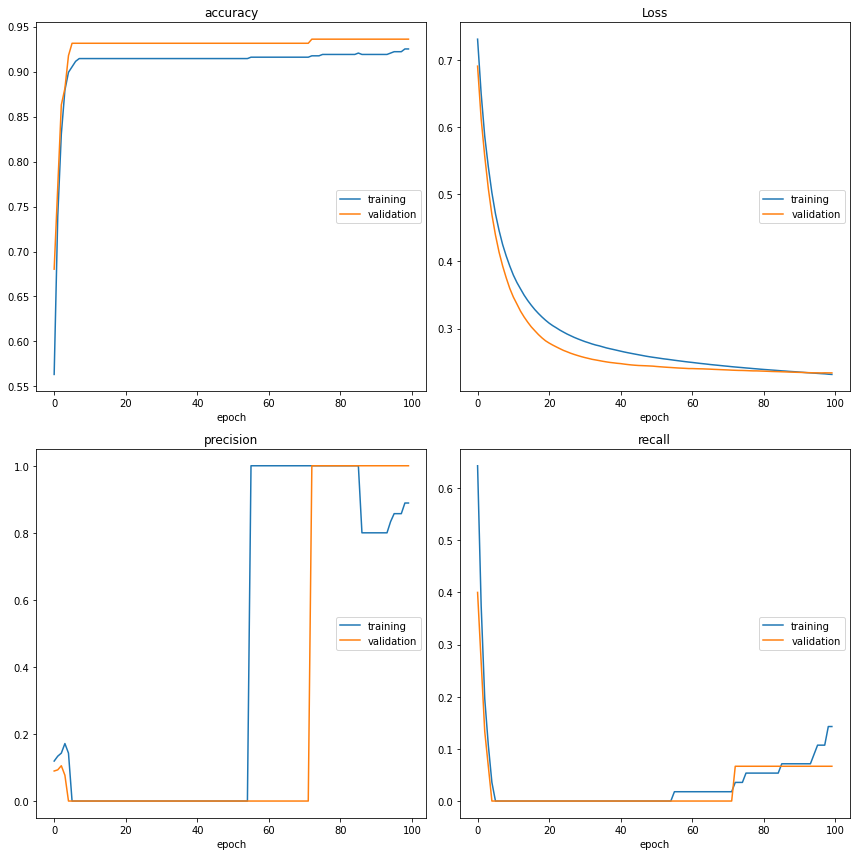

accuracy
	training         	 (min:    0.563, max:    0.925, cur:    0.925)
	validation       	 (min:    0.680, max:    0.936, cur:    0.936)
Loss
	training         	 (min:    0.231, max:    0.732, cur:    0.231)
	validation       	 (min:    0.234, max:    0.692, cur:    0.234)
precision
	training         	 (min:    0.000, max:    1.000, cur:    0.889)
	validation       	 (min:    0.000, max:    1.000, cur:    1.000)
recall
	training         	 (min:    0.000, max:    0.643, cur:    0.143)
	validation       	 (min:    0.000, max:    0.400, cur:    0.067)
11/11 [==============================] - 1s 58ms/step - loss: 0.2315 - accuracy: 0.9252 - precision: 0.8889 - recall: 0.1429 - val_loss: 0.2337 - val_accuracy: 0.9361 - val_precision: 1.0000 - val_recall: 0.0667


In [11]:
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

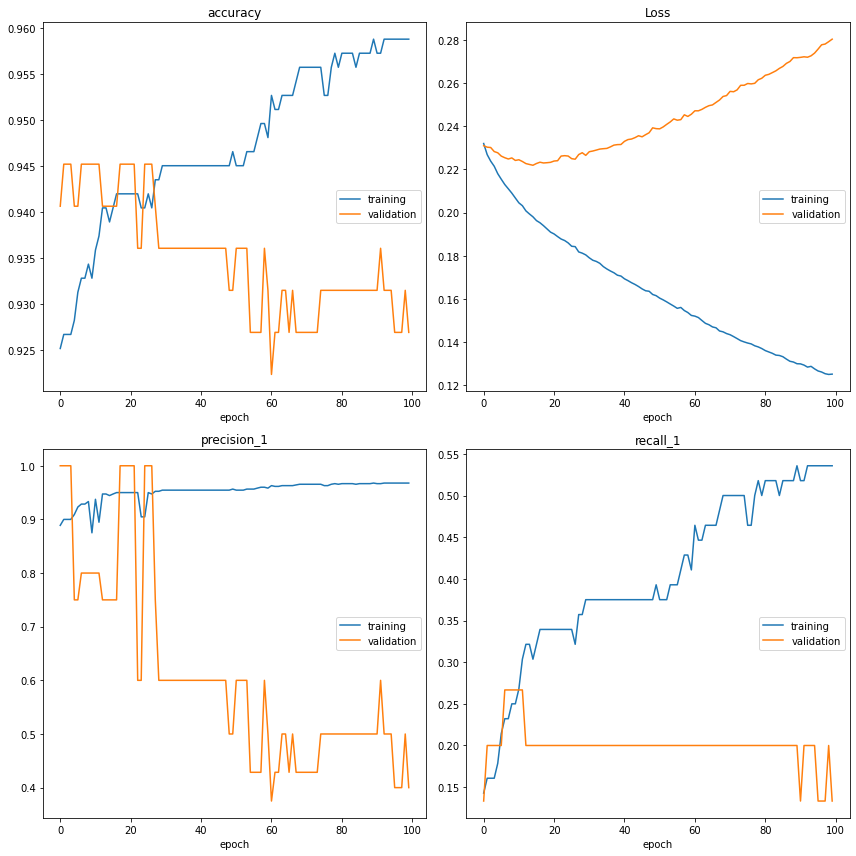

accuracy
	training         	 (min:    0.925, max:    0.959, cur:    0.959)
	validation       	 (min:    0.922, max:    0.945, cur:    0.927)
Loss
	training         	 (min:    0.125, max:    0.232, cur:    0.125)
	validation       	 (min:    0.222, max:    0.280, cur:    0.280)
precision_1
	training         	 (min:    0.875, max:    0.968, cur:    0.968)
	validation       	 (min:    0.375, max:    1.000, cur:    0.400)
recall_1
	training         	 (min:    0.143, max:    0.536, cur:    0.536)
	validation       	 (min:    0.133, max:    0.267, cur:    0.133)
11/11 [==============================] - 1s 61ms/step - loss: 0.1252 - accuracy: 0.9588 - precision_1: 0.9677 - recall_1: 0.5357 - val_loss: 0.2803 - val_accuracy: 0.9269 - val_precision_1: 0.4000 - val_recall_1: 0.1333


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],validation_data=(x_test_std,y_test))

In [13]:
# Imbalance data
y_train.value_counts()

0    599
1     56
Name: Gold_Fund, dtype: int64

# Apply SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [15]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 803, 1: 71})
Resampled dataset shape Counter({0: 803, 1: 803})


In [16]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1606, 15)
(1606,)


In [17]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [18]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

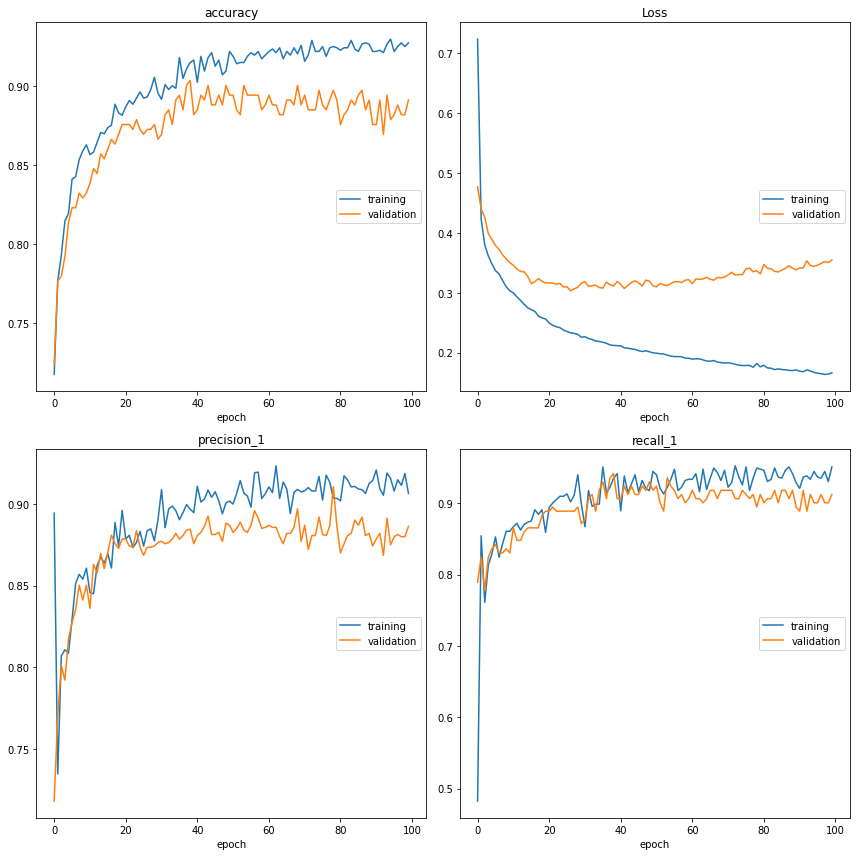

accuracy
	training         	 (min:    0.717, max:    0.930, cur:    0.928)
	validation       	 (min:    0.724, max:    0.904, cur:    0.891)
Loss
	training         	 (min:    0.164, max:    0.723, cur:    0.166)
	validation       	 (min:    0.303, max:    0.477, cur:    0.354)
precision_1
	training         	 (min:    0.735, max:    0.923, cur:    0.906)
	validation       	 (min:    0.718, max:    0.911, cur:    0.886)
recall_1
	training         	 (min:    0.483, max:    0.953, cur:    0.951)
	validation       	 (min:    0.778, max:    0.942, cur:    0.912)
21/21 [==============================] - 1s 28ms/step - loss: 0.1663 - accuracy: 0.9276 - precision_1: 0.9065 - recall_1: 0.9509 - val_loss: 0.3545 - val_accuracy: 0.8913 - val_precision_1: 0.8864 - val_recall_1: 0.9123


In [19]:

model.fit(x_train_std,y_train,epochs=100,batch_size=64,callbacks=[PlotLossesKerasTF()],
          validation_data=(x_test_std,y_test))

# Random Search

In [1]:
!pip install keras-tuner

     ------------------------------------ 176.1/176.1 kB 964.3 kB/s eta 0:00:00


In [21]:
import keras_tuner

In [89]:
# # Try with 1 hyperparameters
def create_model(hp):
    model=Sequential()
    model.add(Input(shape=(15,)))
    
    model.add(Dense(hp.Choice('units',[10,15,20,25]),activation='relu')) #[10,15,20,25] number of neuron in the hidden layer
    
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
    return(model)

In [79]:
# Try with 2 hyperparameters
# def create_model(hp):
#     model=Sequential()
#     model.add(Input(shape=(15,)))
#     model.add(Dense(hp.Choice('units',[10,15,20,25]),activation='relu'))
#     model.add(Dense(1,activation='sigmoid'))
#     opt = hp.Choice('optimizer',values = ['adam','rmsprop','sgd','adagrad'])
#     model.compile(loss='binary_crossentropy',optimizer=opt,
#               metrics=['accuracy',Precision(),Recall()])
#     return(model)

In [91]:
tuner=keras_tuner.RandomSearch(create_model,objective='val_loss',max_trials=2)  # if max=4 it become grid search
# tuner=keras_tuner.RandomSearch(create_model,objective='val_accuracy',max_trials=2)

In [ ]:
tuner.search(x_train_std,y_train,epochs=20,validation_data=(x_test_std,y_test))

Trial 1 Complete [00h 00m 05s]
val_loss: 0.3641950190067291

Best val_loss So Far: 0.3641950190067291
Total elapsed time: 00h 00m 05s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
25                |15                |units

Epoch 1/20
41/41 [==============================] - 1s 12ms/step - loss: 0.7162 - accuracy: 0.5117 - precision: 0.5036 - recall: 0.5522 - val_loss: 0.6258 - val_accuracy: 0.6491 - val_precision: 0.6559 - val_recall: 0.7135
Epoch 2/20
41/41 [==============================] - 0s 5ms/step - loss: 0.5987 - accuracy: 0.6830 - precision: 0.6878 - recall: 0.6519 - val_loss: 0.5550 - val_accuracy: 0.7205 - val_precision: 0.7516 - val_recall: 0.7076
Epoch 3/20
41/41 [==============================] - 0s 5ms/step - loss: 0.5357 - accuracy: 0.7375 - precision: 0.7658 - recall: 0.6725 - val_loss: 0.5122 - val_accuracy: 0.7391 - val_precision: 0.7806 - val_recall: 0.7076
Epoch 4/20
41/41 [==============================] - 0s 5ms/step - loss: 0.

In [82]:
tuner.get_best_models()

In [83]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 25
optimizer: rmsprop
Score: 0.34886693954467773
Trial summary
Hyperparameters:
units: 20
optimizer: adagrad
Score: 0.7062879204750061


In [84]:
# To get best parameters
tuner.get_best_hyperparameters()[0].values

{'units': 25, 'optimizer': 'rmsprop'}

In [85]:
models=tuner.get_best_models(num_models=2)

In [86]:
models

In [87]:
# best model store at 0 location
best_model=models[0]

In [88]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                400       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________
